In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing Data
credit_data=pd.read_csv('F:\Munesh Backup\Munesh\Imarticus\Projects\Decision Tree\German_Credit_data.csv')

In [3]:
credit_data.shape

(1000, 21)

In [4]:
credit_data.head(5)

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
credit_data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000018650FE940>,
      dtype=object)

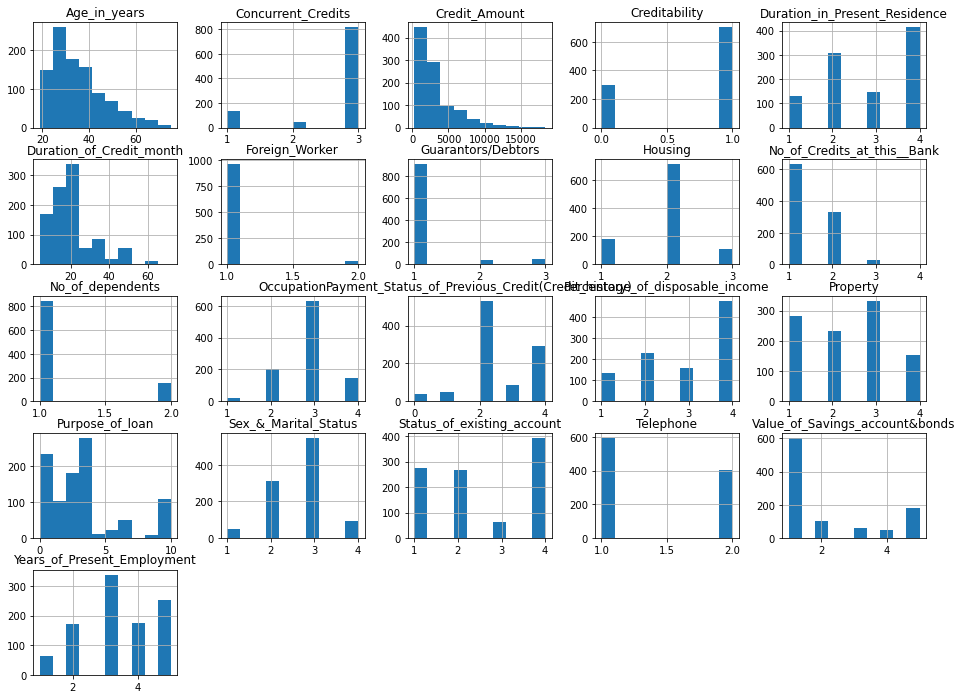

In [7]:
# visualizing the distribution plot for data
import matplotlib.pyplot as plt
import seaborn as sns
credit_data.hist(figsize=(16,12))

1    700
0    300
Name: Creditability, dtype: int64

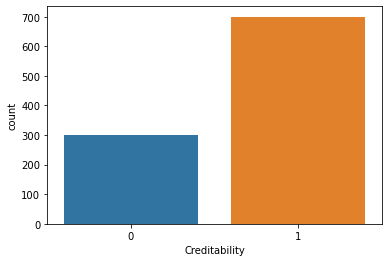

In [8]:
# plotting the y variable
sns.countplot(credit_data.Creditability)
credit_data.Creditability.value_counts()

In [9]:
# checking for unique values
credit_data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

In [10]:
#checking for null
credit_data.isnull().sum()

Creditability                                        0
Status_of_existing_account                           0
Duration_of_Credit_month                             0
Payment_Status_of_Previous_Credit(Credit_history)    0
Purpose_of_loan                                      0
Credit_Amount                                        0
Value_of_Savings_account&bonds                       0
Years_of_Present_Employment                          0
Percentage_of_disposable_income                      0
Sex_&_Marital_Status                                 0
Guarantors/Debtors                                   0
Duration_in_Present_Residence                        0
Property                                             0
Age_in_years                                         0
Concurrent_Credits                                   0
Housing                                              0
No_of_Credits_at_this__Bank                          0
Occupation                                           0
No_of_depe

In [11]:
credit_data[credit_data==0].count()

Creditability                                        300
Status_of_existing_account                             0
Duration_of_Credit_month                               0
Payment_Status_of_Previous_Credit(Credit_history)     40
Purpose_of_loan                                      234
Credit_Amount                                          0
Value_of_Savings_account&bonds                         0
Years_of_Present_Employment                            0
Percentage_of_disposable_income                        0
Sex_&_Marital_Status                                   0
Guarantors/Debtors                                     0
Duration_in_Present_Residence                          0
Property                                               0
Age_in_years                                           0
Concurrent_Credits                                     0
Housing                                                0
No_of_Credits_at_this__Bank                            0
Occupation                     

In [12]:
# shuffling the data
credit_data.sample(frac=1)

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
556,1,2,48,0,0,8358,3,2,1,2,...,1,3,30,3,2,2,3,1,1,1
563,1,3,24,2,3,1377,2,5,4,2,...,2,4,47,3,3,1,3,1,2,1
620,1,4,24,2,1,9277,5,3,2,1,...,4,4,48,3,3,1,3,1,2,1
196,1,4,6,4,0,6761,1,4,1,3,...,3,4,45,3,2,2,4,2,2,1
369,1,1,24,2,2,3021,1,3,2,1,...,2,1,24,3,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,1,12,0,5,1108,1,4,4,3,...,3,1,28,3,2,2,3,1,1,1
135,1,4,6,2,2,1543,4,3,4,1,...,2,1,33,3,2,1,3,1,1,1
676,1,1,9,4,3,1138,1,3,4,3,...,4,1,25,3,2,2,2,1,1,1
550,1,2,12,2,0,2002,1,4,3,3,...,4,2,30,3,1,1,3,2,2,1


In [13]:
# splitting the data
train,test=train_test_split(credit_data,test_size=0.3)
trainx=train.drop('Creditability',axis=1)
trainy=train.Creditability
testx=test.drop('Creditability',axis=1)
testy=test.Creditability
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(700, 20)
(700,)
(300, 20)
(300,)


In [14]:
# with default hyperparameters
m1=DecisionTreeClassifier(criterion='gini').fit(trainx,trainy)

In [15]:
m1_predict=m1.predict(testx)
m1_predict[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [16]:
# plotting the tree
from sklearn import tree
from IPython.display import Image,SVG
from subprocess import check_call
from graphviz import Source

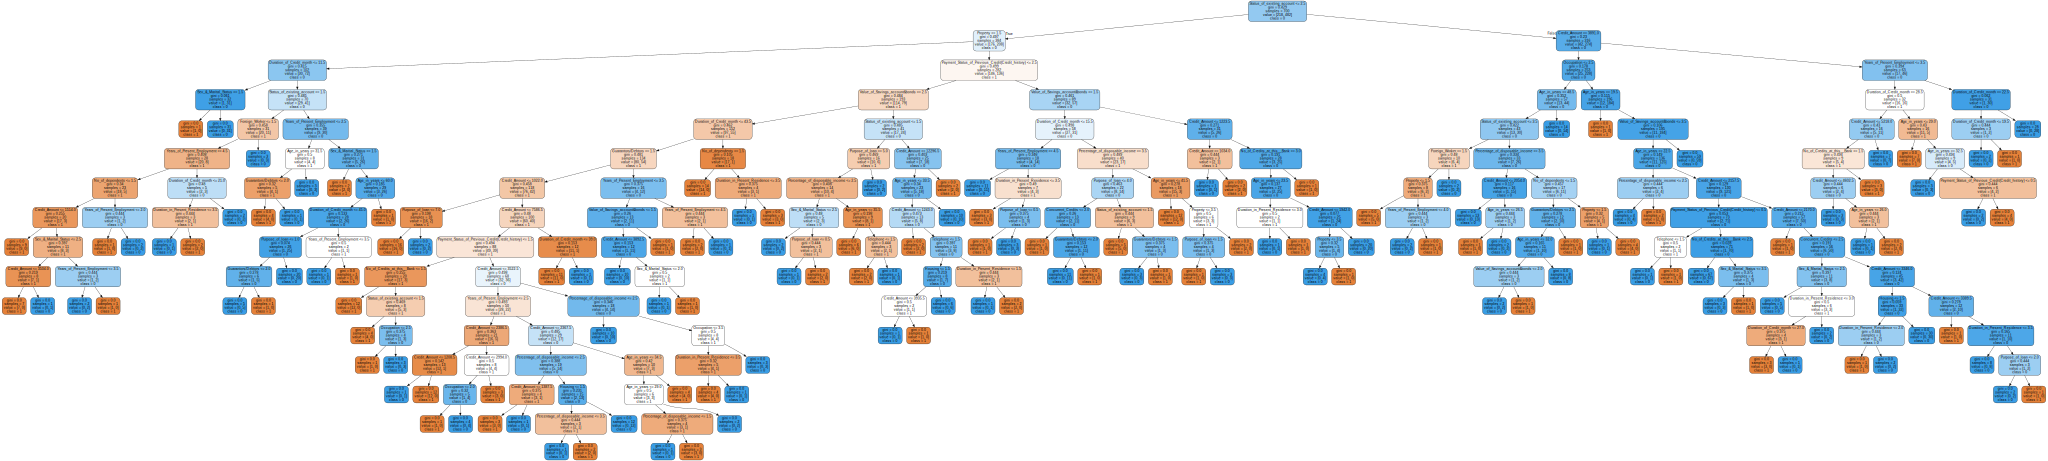

In [17]:
classes=(credit_data.Creditability.unique()).astype(str)
graph=Source(tree.export_graphviz(m1,out_file=None,feature_names=trainx.columns,
                                  filled=True,rounded=True,class_names=classes))
SVG(graph.pipe(format='svg'))


# to save image and  plot
#graph=Source(tree.export_graphviz(m1,out_file='credit_data.dot',feature_names=trainx.columns,
#                                  filled=True,rounded=True,class_names=classes))
#converting dot to jpg
#check_call(['dot','-Tjpg','credit_data.dot','-o','credit_data.jpg'])

#Image(filename='credit_data.jpg')


In [18]:
# Confusion matrix
m1_cf=metrics.confusion_matrix(testy,m1_predict)
print(m1_cf)
#classification_report
m1_cr=metrics.classification_report(testy,m1_predict)
print(m1_cr)
#printing other metrics
print('precision score:',np.round(metrics.precision_score(testy,m1_predict),2))
print('accuracy score:',np.round(metrics.accuracy_score(testy,m1_predict),2))
print('recall score:',np.round(metrics.recall_score(testy,m1_predict),2))
print('kappa score:',np.round(metrics.cohen_kappa_score(testy,m1_predict),2))


[[ 41  41]
 [ 52 166]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        82
           1       0.80      0.76      0.78       218

    accuracy                           0.69       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.70      0.69      0.70       300

precision score: 0.8
accuracy score: 0.69
recall score: 0.76
kappa score: 0.25


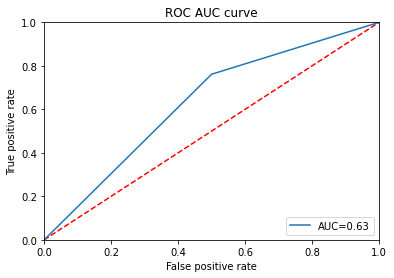

In [19]:
#plotting roc auc curve
auc=metrics.roc_auc_score(testy,m1_predict)
fpr,tpr,threshold=metrics.roc_curve(testy,m1_predict)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC AUC curve')
plt.plot(fpr,tpr,label='AUC=%0.2f'%auc)
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [20]:
# Creating report
cols=['Model','precision','accuracy','recall','ROC_AUC','kappa']
models_report=pd.DataFrame(columns=cols)
model1_report=pd.Series({'Model':'Decision Tree with gini',
                        'precision':metrics.precision_score(testy,m1_predict),
                        'accuracy':metrics.accuracy_score(testy,m1_predict),
                        'recall':metrics.recall_score(testy,m1_predict),
                        'ROC_AUC':metrics.roc_auc_score(testy,m1_predict),
                        'kappa':metrics.cohen_kappa_score(testy,m1_predict)})
models_report=models_report.append(model1_report,ignore_index=True)
models_report

,Model,precision,accuracy,recall,ROC_AUC,kappa
0,Decision Tree with gini,0.801932,0.69,0.761468,0.630734,0.250966


In [21]:
#model with criterion entropy
m2=DecisionTreeClassifier(criterion='entropy').fit(trainx,trainy)
m2_predict=m2.predict(testx)
m2_predict[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [22]:
# confusion matrix
m2_cm=metrics.confusion_matrix(testy,m2_predict)
print(m2_cm)
# classification report
m2_cr=metrics.classification_report(testy,m2_predict)
print(m2_cr)

[[ 44  38]
 [ 61 157]]
              precision    recall  f1-score   support

           0       0.42      0.54      0.47        82
           1       0.81      0.72      0.76       218

    accuracy                           0.67       300
   macro avg       0.61      0.63      0.62       300
weighted avg       0.70      0.67      0.68       300



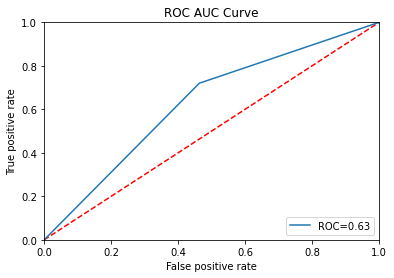

In [23]:
# plotting roc auc curve
auc=metrics.roc_auc_score(testy,m2_predict)
fpr,tpr,threshold=metrics.roc_curve(testy,m2_predict)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label="ROC=%0.2f"%auc)
plt.legend(loc='lower right')
plt.title('ROC AUC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [24]:
#model report
model2_report=pd.Series({'Model':'Decision Tree with entropy',
                        'precision':metrics.precision_score(testy,m2_predict),
                        'recall':metrics.recall_score(testy,m2_predict),
                        'accuracy':metrics.accuracy_score(testy,m2_predict),
                        'ROC_AUC':metrics.roc_auc_score(testy,m2_predict),
                        'kappa':metrics.cohen_kappa_score(testy,m2_predict)})
models_report=models_report.append(model2_report,ignore_index=True)
models_report

,Model,precision,accuracy,recall,ROC_AUC,kappa
0,Decision Tree with gini,0.801932,0.69,0.761468,0.630734,0.250966
1,Decision Tree with entropy,0.805128,0.67,0.720183,0.628384,0.236111


In [25]:
#model with hyperparmetric tuning
m3=DecisionTreeClassifier(criterion='gini',max_depth=10,
                         min_samples_split=4,min_samples_leaf=1).fit(trainx,trainy)
m3_predict=m3.predict(testx)

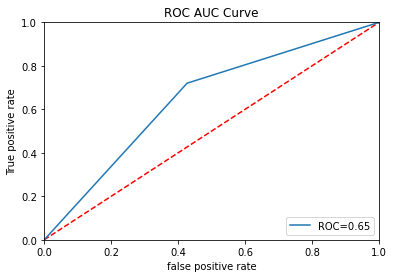

In [26]:
#plotting ROC AUC curve
auc=metrics.roc_auc_score(testy,m3_predict)
fpr,tpr,threshold=metrics.roc_curve(testy,m3_predict)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label='ROC=%0.2f'%auc)
plt.legend(loc='lower right')
plt.title('ROC AUC Curve')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [27]:
#appending report
model3_report=pd.Series({'Model':'Decision Tree with hyperparameter tuned',
                        'precision':metrics.precision_score(testy,m3_predict),
                        'recall':metrics.recall_score(testy,m3_predict),
                        'accuracy':metrics.accuracy_score(testy,m3_predict),
                        'ROC_AUC':metrics.roc_auc_score(testy,m3_predict),
                        'kappa':metrics.cohen_kappa_score(testy,m3_predict)})
models_report=models_report.append(model3_report,ignore_index=True)
models_report

,Model,precision,accuracy,recall,ROC_AUC,kappa
0,Decision Tree with gini,0.801932,0.69,0.761468,0.630734,0.250966
1,Decision Tree with entropy,0.805128,0.67,0.720183,0.628384,0.236111
2,Decision Tree with hyperparameter tuned,0.817708,0.68,0.720183,0.646677,0.266952


In [28]:
models_report

,Model,precision,accuracy,recall,ROC_AUC,kappa
0,Decision Tree with gini,0.801932,0.69,0.761468,0.630734,0.250966
1,Decision Tree with entropy,0.805128,0.67,0.720183,0.628384,0.236111
2,Decision Tree with hyperparameter tuned,0.817708,0.68,0.720183,0.646677,0.266952


In [29]:
#Pruning the tree using max depth and KFold Cross validation
from sklearn.model_selection import KFold,cross_val_score
crossvalidation=KFold(n_splits=10)
# getting scores for  variable depth of trees
cv_score=pd.DataFrame(columns=['max_depth','cv_score'])
for i in range(1,15):
    model=DecisionTreeClassifier(criterion='gini',max_depth=i)
    score=np.mean(cross_val_score(model,trainx,trainy,cv=crossvalidation,scoring='accuracy'))
    cv_score=cv_score.append({'max_depth':i,'cv_score':score},ignore_index=True)
    
cv_score

,max_depth,cv_score
0,1.0,0.688571
1,2.0,0.658571
2,3.0,0.695714
3,4.0,0.688571
4,5.0,0.695714
5,6.0,0.694286
6,7.0,0.687143
7,8.0,0.681429
8,9.0,0.668571
9,10.0,0.678571


In [30]:
# model with max depth 2
m4=DecisionTreeClassifier(criterion='gini',max_depth=2).fit(trainx,trainy)
m4_predict=m4.predict(testx)

#appending to models report
model4_report=pd.Series({'Model':'Decision Tree with max depth 2',
                        'precision':metrics.precision_score(testy,m4_predict),
                        'recall':metrics.recall_score(testy,m4_predict),
                        'accuracy':metrics.accuracy_score(testy,m4_predict),
                        'ROC_AUC':metrics.roc_auc_score(testy,m4_predict),
                        'kappa':metrics.cohen_kappa_score(testy,m4_predict)})
models_report=models_report.append(model4_report,ignore_index=True)
models_report

,Model,precision,accuracy,recall,ROC_AUC,kappa
0,Decision Tree with gini,0.801932,0.690000,0.761468,0.630734,0.250966
1,Decision Tree with entropy,0.805128,0.670000,0.720183,0.628384,0.236111
2,Decision Tree with hyperparameter tuned,0.817708,0.680000,0.720183,0.646677,0.266952
3,Decision Tree with max depth 2,0.836957,0.686667,0.706422,0.670284,0.301565


In [31]:
# Pruning the tree using cost complexity pruing
m5=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.01).fit(trainx,trainy)
m5_predict=m5.predict(testx)
#appending report
model5_report=pd.Series({'Model':'Decision Tree with cost complexity pruning',
                        'precision':metrics.precision_score(testy,m5_predict),
                        'recall':metrics.recall_score(testy,m5_predict),
                        'accuracy':metrics.accuracy_score(testy,m5_predict),
                        'ROC_AUC':metrics.roc_auc_score(testy,m5_predict),
                        'kappa':metrics.cohen_kappa_score(testy,m5_predict)})
models_report=models_report.append(model5_report,ignore_index=True)
models_report

,Model,precision,accuracy,recall,ROC_AUC,kappa
0,Decision Tree with gini,0.801932,0.690000,0.761468,0.630734,0.250966
1,Decision Tree with entropy,0.805128,0.670000,0.720183,0.628384,0.236111
2,Decision Tree with hyperparameter tuned,0.817708,0.680000,0.720183,0.646677,0.266952
3,Decision Tree with max depth 2,0.836957,0.686667,0.706422,0.670284,0.301565
4,Decision Tree with cost complexity pruning,0.836957,0.686667,0.706422,0.670284,0.301565


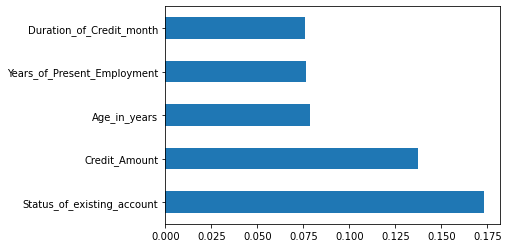

In [32]:
#feature importance
imp_features=pd.Series(m1.feature_importances_,index=trainx.columns)
imp_features.nlargest(5).plot(kind='barh')


In [33]:
#feature importance using RFE
from sklearn.feature_selection import RFE
rfe=RFE(m1,5).fit(trainx,trainy)

C:\Users\Shakeel\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [34]:
imp_features=pd.DataFrame({'features':trainx.columns,'support':rfe.support_,'ranking':rfe.ranking_})
imp_features.sort_values('ranking')


,features,support,ranking
0,Status_of_existing_account,True,1
1,Duration_of_Credit_month,True,1
4,Credit_Amount,True,1
6,Years_of_Present_Employment,True,1
12,Age_in_years,True,1
3,Purpose_of_loan,False,2
11,Property,False,3
2,Payment_Status_of_Previous_Credit(Credit_history),False,4
7,Percentage_of_disposable_income,False,5
5,Value_of_Savings_account&bonds,False,6
